In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math 
import os

import matplotlib.pyplot as plt

### Generate data for analysis

In [2]:
filename = os.listdir('../dash-2019-coronavirus/cumulative_data/')
sheet_name = [i.replace('.csv', '') for i in filename if i.endswith('.csv')]
dfs = {sheet_name: pd.read_csv('../dash-2019-coronavirus/cumulative_data/{}.csv'.format(sheet_name))
          for sheet_name in sheet_name}

In [3]:
DailyData = dfs[sheet_name[0]][['date_day']]
for region in sheet_name:
    #DailyData[region] = dfs[region]['New']
    DailyData.loc[:, region] = dfs[region].loc[:,'New']
DailyData.set_index('date_day', inplace=True)
DailyData = DailyData.sort_index()
# Remove the latest day as it is not compeleted
DailyData = DailyData.drop(DailyData.iloc[-1].name)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [59]:
DailyData['China']

date_day
2020-01-21        0
2020-01-22      222
2020-01-23       90
2020-01-24      226
2020-01-25      455
2020-01-26      659
2020-01-27      758
2020-01-28     1672
2020-01-29     1561
2020-01-30     1708
2020-01-31     1980
2020-02-01     1563
2020-02-02     3230
2020-02-03     2851
2020-02-04     3181
2020-02-05     3902
2020-02-06     3700
2020-02-07     3102
2020-02-08     3422
2020-02-09     2621
2020-02-10     2965
2020-02-11     2463
2020-02-12     2027
2020-02-13    15137
2020-02-14     4040
2020-02-15     2634
2020-02-16     2011
2020-02-17     2046
2020-02-18     1885
2020-02-19     1746
2020-02-20      394
2020-02-21      669
2020-02-22     1044
2020-02-23      645
2020-02-24      214
2020-02-25      510
2020-02-26      404
2020-02-27      433
2020-02-28      327
2020-02-29      427
2020-03-01      572
2020-03-02      203
2020-03-03      125
2020-03-04      115
2020-03-05      142
2020-03-06      143
2020-03-07      100
2020-03-08       44
2020-03-09       40
2020-03-10 

In [33]:
DailyData.to_csv('DailyData.csv', index=True)

### Use fixed data

In [39]:
DailyData = pd.read_csv('./DailyData.csv', index_col=0)

In [40]:
DailyData

,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Turkey,U.S. Virgin Islands,UK,Ukraine,United Arab Emirates,Uruguay,US,Vatican City,Venezuela,Vietnam
date_day,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PCoA and K-mean clustering for growing pattern

In [5]:
# Only include coutries have cases more than 50
DailyDataFifty = DailyData[[i for i in DailyData.columns if DailyData[i].sum()>50]]

In [8]:
DailyDataFifty.shape

(54, 49)

In [6]:
# Data transformation to reduce the effect of data scale on pattern identification
# Square root transformation
DailyDataFiftyTrans = DailyDataFifty**0.5

In [7]:
# Normalisation column-wise
from sklearn import preprocessing

x = DailyDataFiftyTrans.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
DailyDataFiftyNorm = pd.DataFrame(x_scaled)
DailyDataFiftyNorm.columns = DailyDataFifty.columns

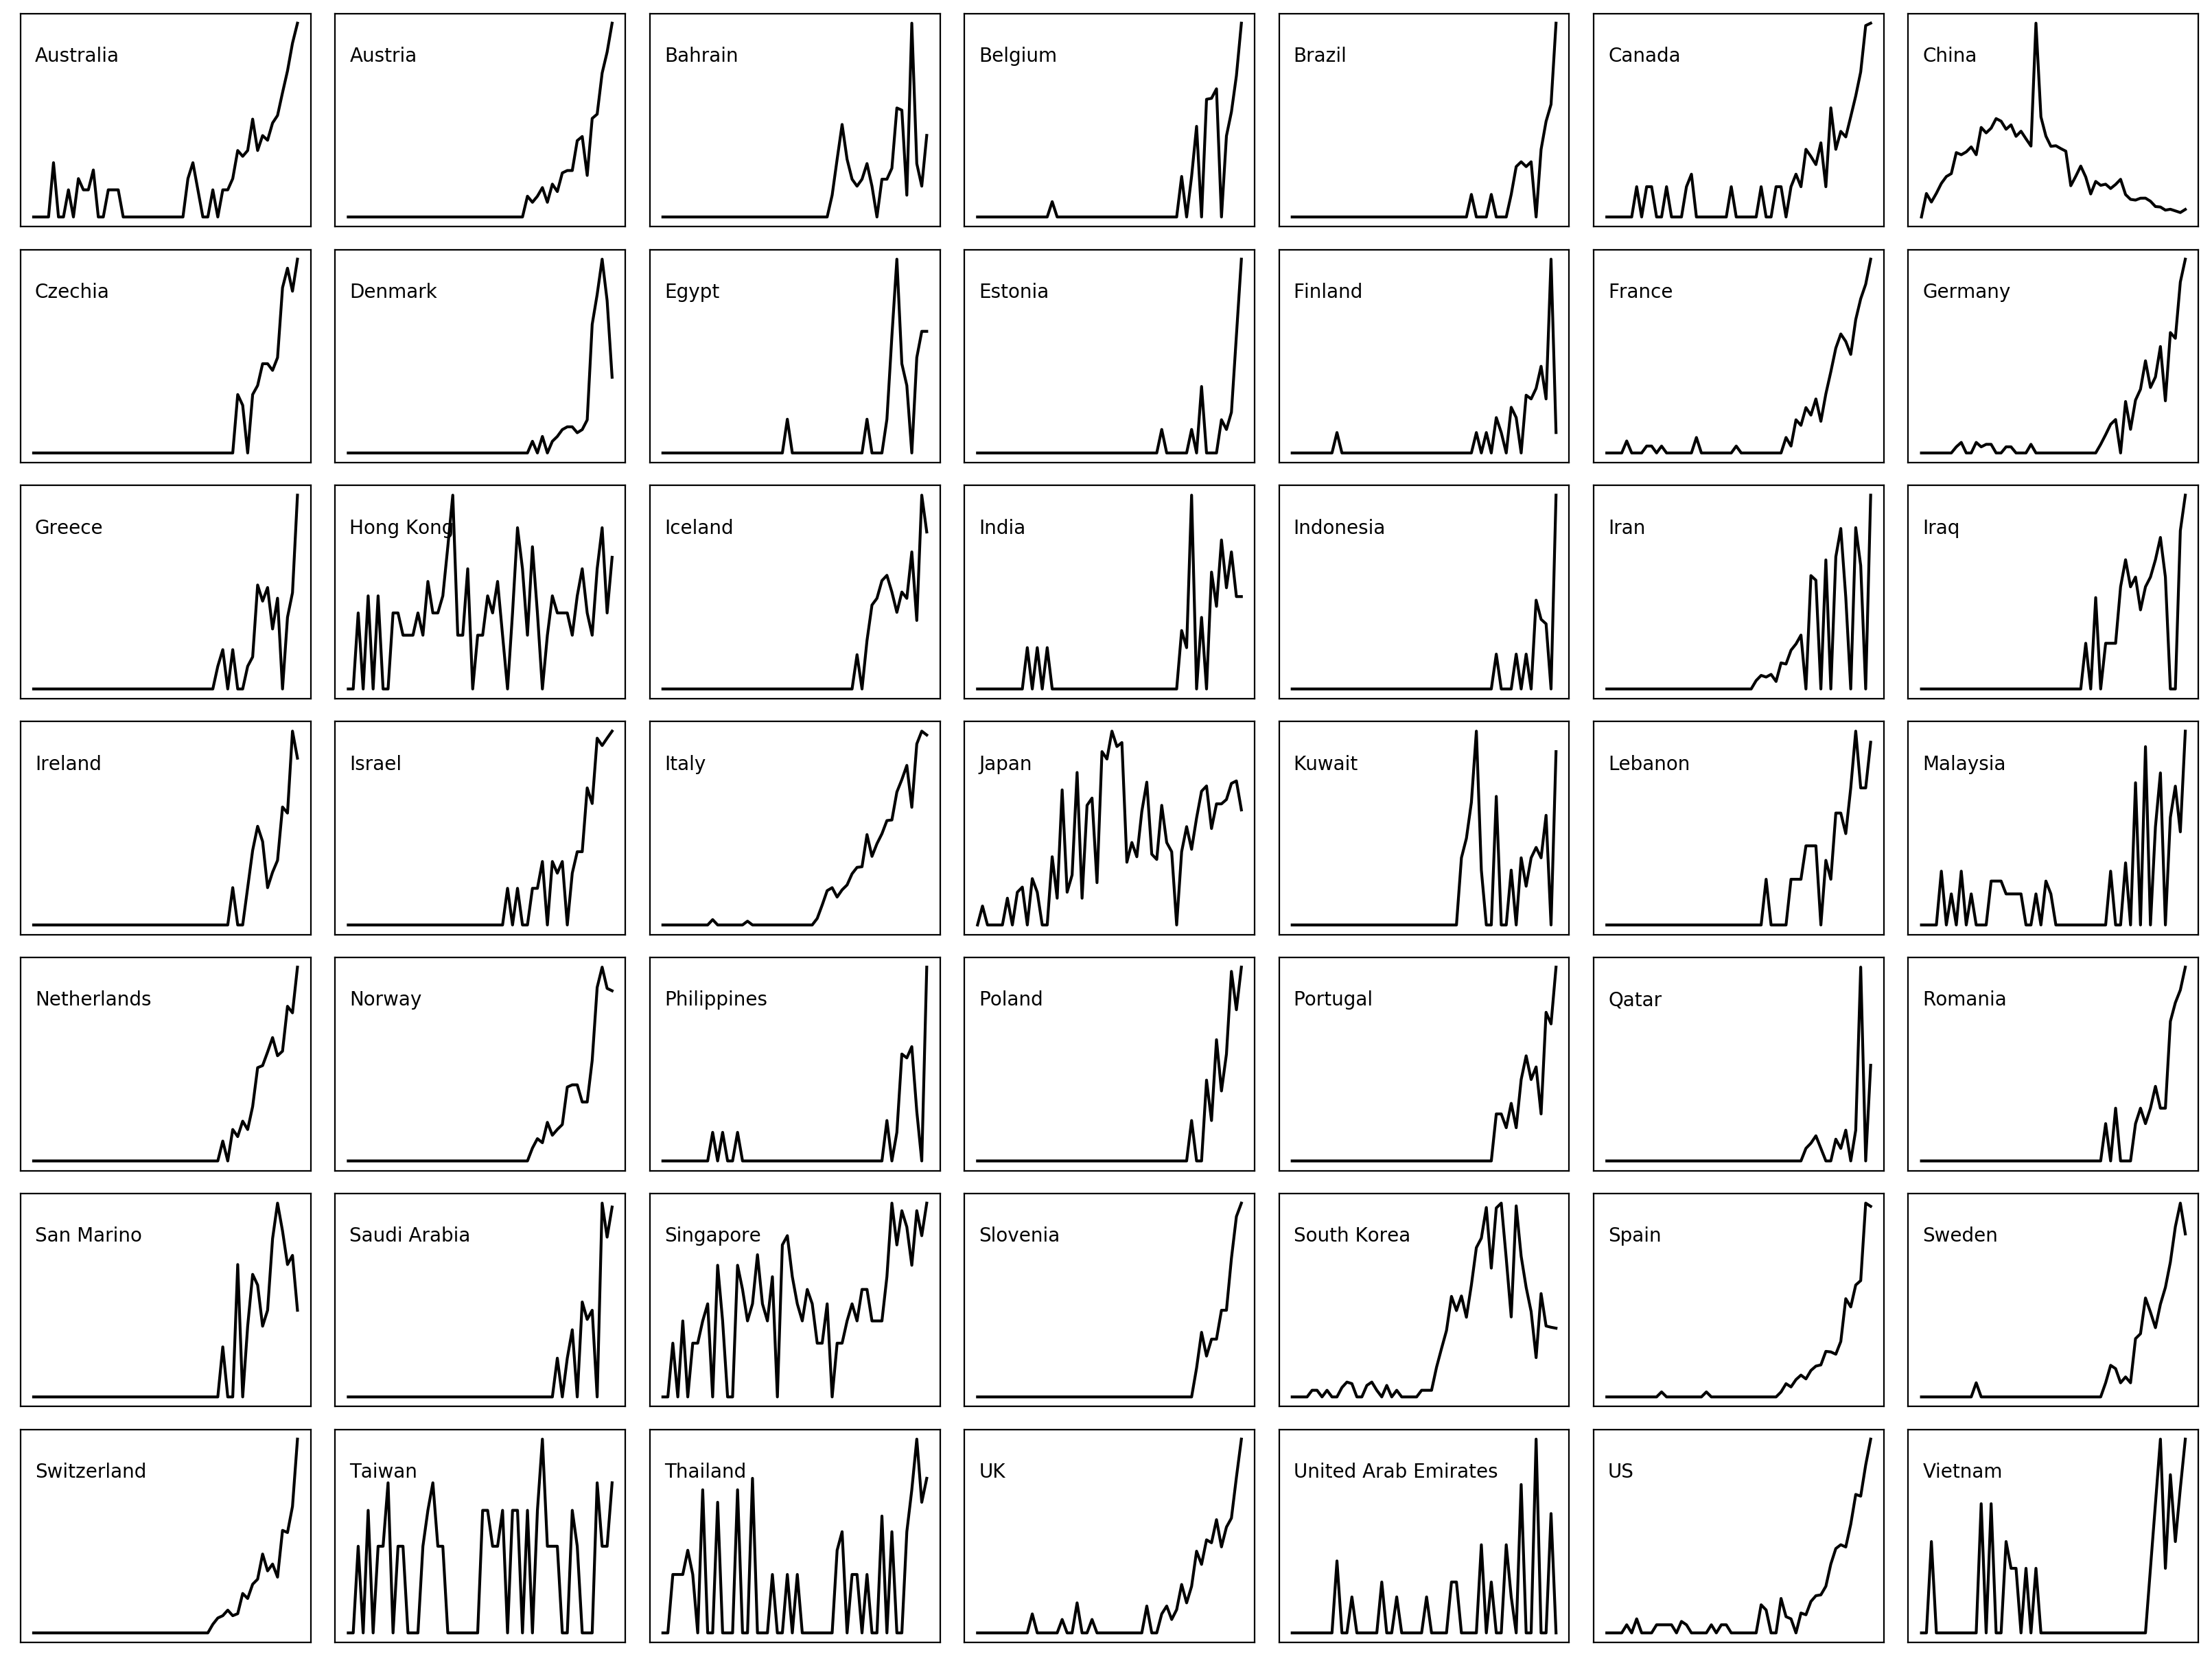

In [46]:
fig = plt.figure(figsize=(16,12), dpi=200, constrained_layout=True)

axs = fig.subplots(nrows=7, ncols=7)

for i in range(len(DailyDataFiftyNorm.columns)):
    axs.flat[i].plot(DailyDataFiftyNorm.index, DailyDataFiftyNorm.iloc[:,i], color='black')
    axs.flat[i].get_xaxis().set_ticks([])
    axs.flat[i].get_yaxis().set_ticks([])
    axs.flat[i].annotate(DailyDataFiftyNorm.iloc[:,i].name, (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')

In [48]:
#fig.savefig('pattern_uncluster2.png')

In [12]:
def bray_curtis_distance(table, sample1_id, sample2_id):
    '''function to calculate bray-curtis distance'''
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    return numerator / denominator

In [13]:
from skbio.stats.distance import DistanceMatrix
from numpy import zeros

def table_to_distances(table, pairwise_distance_fn):
    '''pairwise distance as a table'''
    sample_ids = table.columns
    num_samples = len(sample_ids)
    data = zeros((num_samples, num_samples))
    for i, sample1_id in enumerate(sample_ids):
        for j, sample2_id in enumerate(sample_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table, sample1_id, sample2_id)
    return DistanceMatrix(data, sample_ids)

In [14]:
# Produce a bray-curtis distance matrix
bc_dm = table_to_distances(DailyDataFiftyNorm, bray_curtis_distance)
print(bc_dm)

49x49 distance matrix
IDs:
'Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'China', ...
Data:
[[0.         0.23788862 0.46568164 ... 0.57771764 0.20146273 0.48885542]
 [0.23788862 0.         0.40560861 ... 0.63661521 0.14222527 0.46645296]
 [0.46568164 0.40560861 0.         ... 0.80637082 0.3974453  0.57627526]
 ...
 [0.57771764 0.63661521 0.80637082 ... 0.         0.65006599 0.73440116]
 [0.20146273 0.14222527 0.3974453  ... 0.65006599 0.         0.44335586]
 [0.48885542 0.46645296 0.57627526 ... 0.73440116 0.44335586 0.        ]]


In [15]:
# Using PCA on distance matrix and keep the first two components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(bc_dm.data)

In [16]:
# Variance explained by the first two components
print(pca.explained_variance_)

[0.93592636 0.15798306]


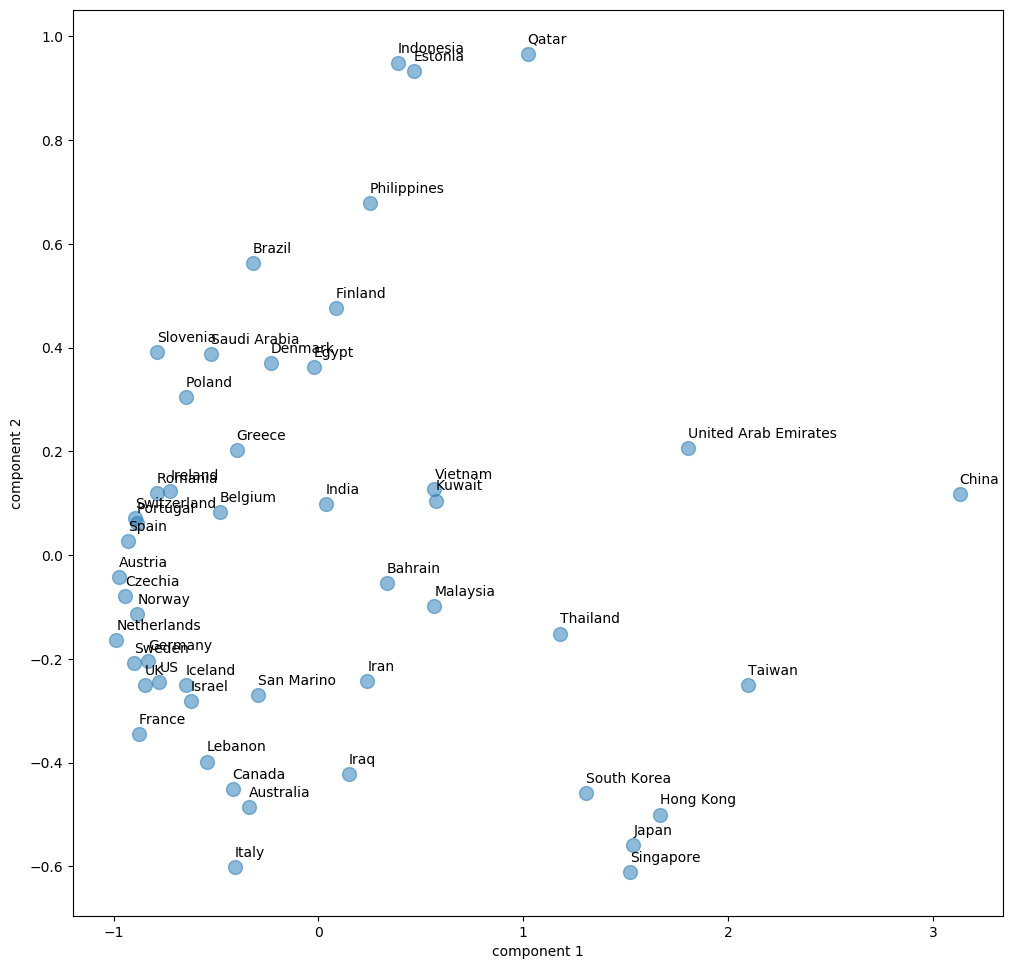

In [17]:
plt.figure(figsize=(12,12), dpi=100)

plt.scatter(projected[:, 0], projected[:, 1], s=100,
            alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

for i, txt in enumerate(bc_dm.ids):
    plt.annotate(txt, (projected[:, 0][i], projected[:, 1][i]+0.02))

In [54]:
# Cluster countries using K-mean
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=5, random_state=0).fit(projected)
kmeans.labels_

array([0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 4, 4, 0, 0, 0, 3, 0, 1, 4, 1, 1, 0,
       0, 0, 3, 1, 0, 1, 0, 0, 4, 0, 0, 4, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3,
       3, 0, 3, 0, 1], dtype=int32)

In [55]:
# Assign color to each cluster
color = []
for i in kmeans.labels_:
    if i == 3:
        color.append('#a6d96a')
    elif i == 0:
        color.append('#d7191c')
    elif i == 1:
        color.append('#2b83ba')
    elif i == 2:
        color.append('#1a9641')
    else:
        color.append('#fdae61')

In [63]:
# Create a metadata table
clusterData = pd.DataFrame({'Cluster':kmeans.labels_,
                            'Region':bc_dm.ids,
                            'Color':color,
                            'Cases':[DailyDataFifty[i].sum() for i in bc_dm.ids],
                            'PC1':projected[:, 0],
                            'PC2':projected[:, 1],
                           },
                            )
clusterData

,Cluster,Region,Color,Cases,PC1,PC2
0,0,Australia,#d7191c,248,-0.337540,-0.484846
1,0,Austria,#d7191c,602,-0.973804,-0.041412
2,1,Bahrain,#2b83ba,211,0.335305,-0.052869
3,0,Belgium,#d7191c,559,-0.480528,0.082476
4,0,Brazil,#d7191c,151,-0.318584,0.563726
5,0,Canada,#d7191c,198,-0.419199,-0.451192
6,2,China,#1a9641,80497,3.130250,0.118518
7,0,Czechia,#d7191c,150,-0.944017,-0.079261
8,0,Denmark,#d7191c,827,-0.231793,0.370550
9,1,Egypt,#2b83ba,93,-0.021865,0.362393


In [64]:
# Re-assign cluster id as desired order
clusterData = clusterData.replace({'Cluster': {0: 9, 1: 7, 2:5, 3:6, 4:8}})
clusterData = clusterData.sort_values(by=['Cluster', 'Cases'], ascending=False)
clusterData = clusterData.reset_index(drop=True)
clusterData

,Cluster,Region,Color,Cases,PC1,PC2
0,9,Italy,#d7191c,17660,-0.408488,-0.601096
1,9,Spain,#d7191c,5232,-0.927959,0.027671
2,9,Germany,#d7191c,3758,-0.829520,-0.203151
3,9,France,#d7191c,3661,-0.877380,-0.344725
4,9,US,#d7191c,2323,-0.776273,-0.245002
5,9,Switzerland,#d7191c,1375,-0.893993,0.071303
6,9,Norway,#d7191c,1003,-0.884528,-0.113970
7,9,Denmark,#d7191c,827,-0.231793,0.370550
8,9,Sweden,#d7191c,821,-0.899614,-0.208497
9,9,Netherlands,#d7191c,804,-0.986694,-0.164176


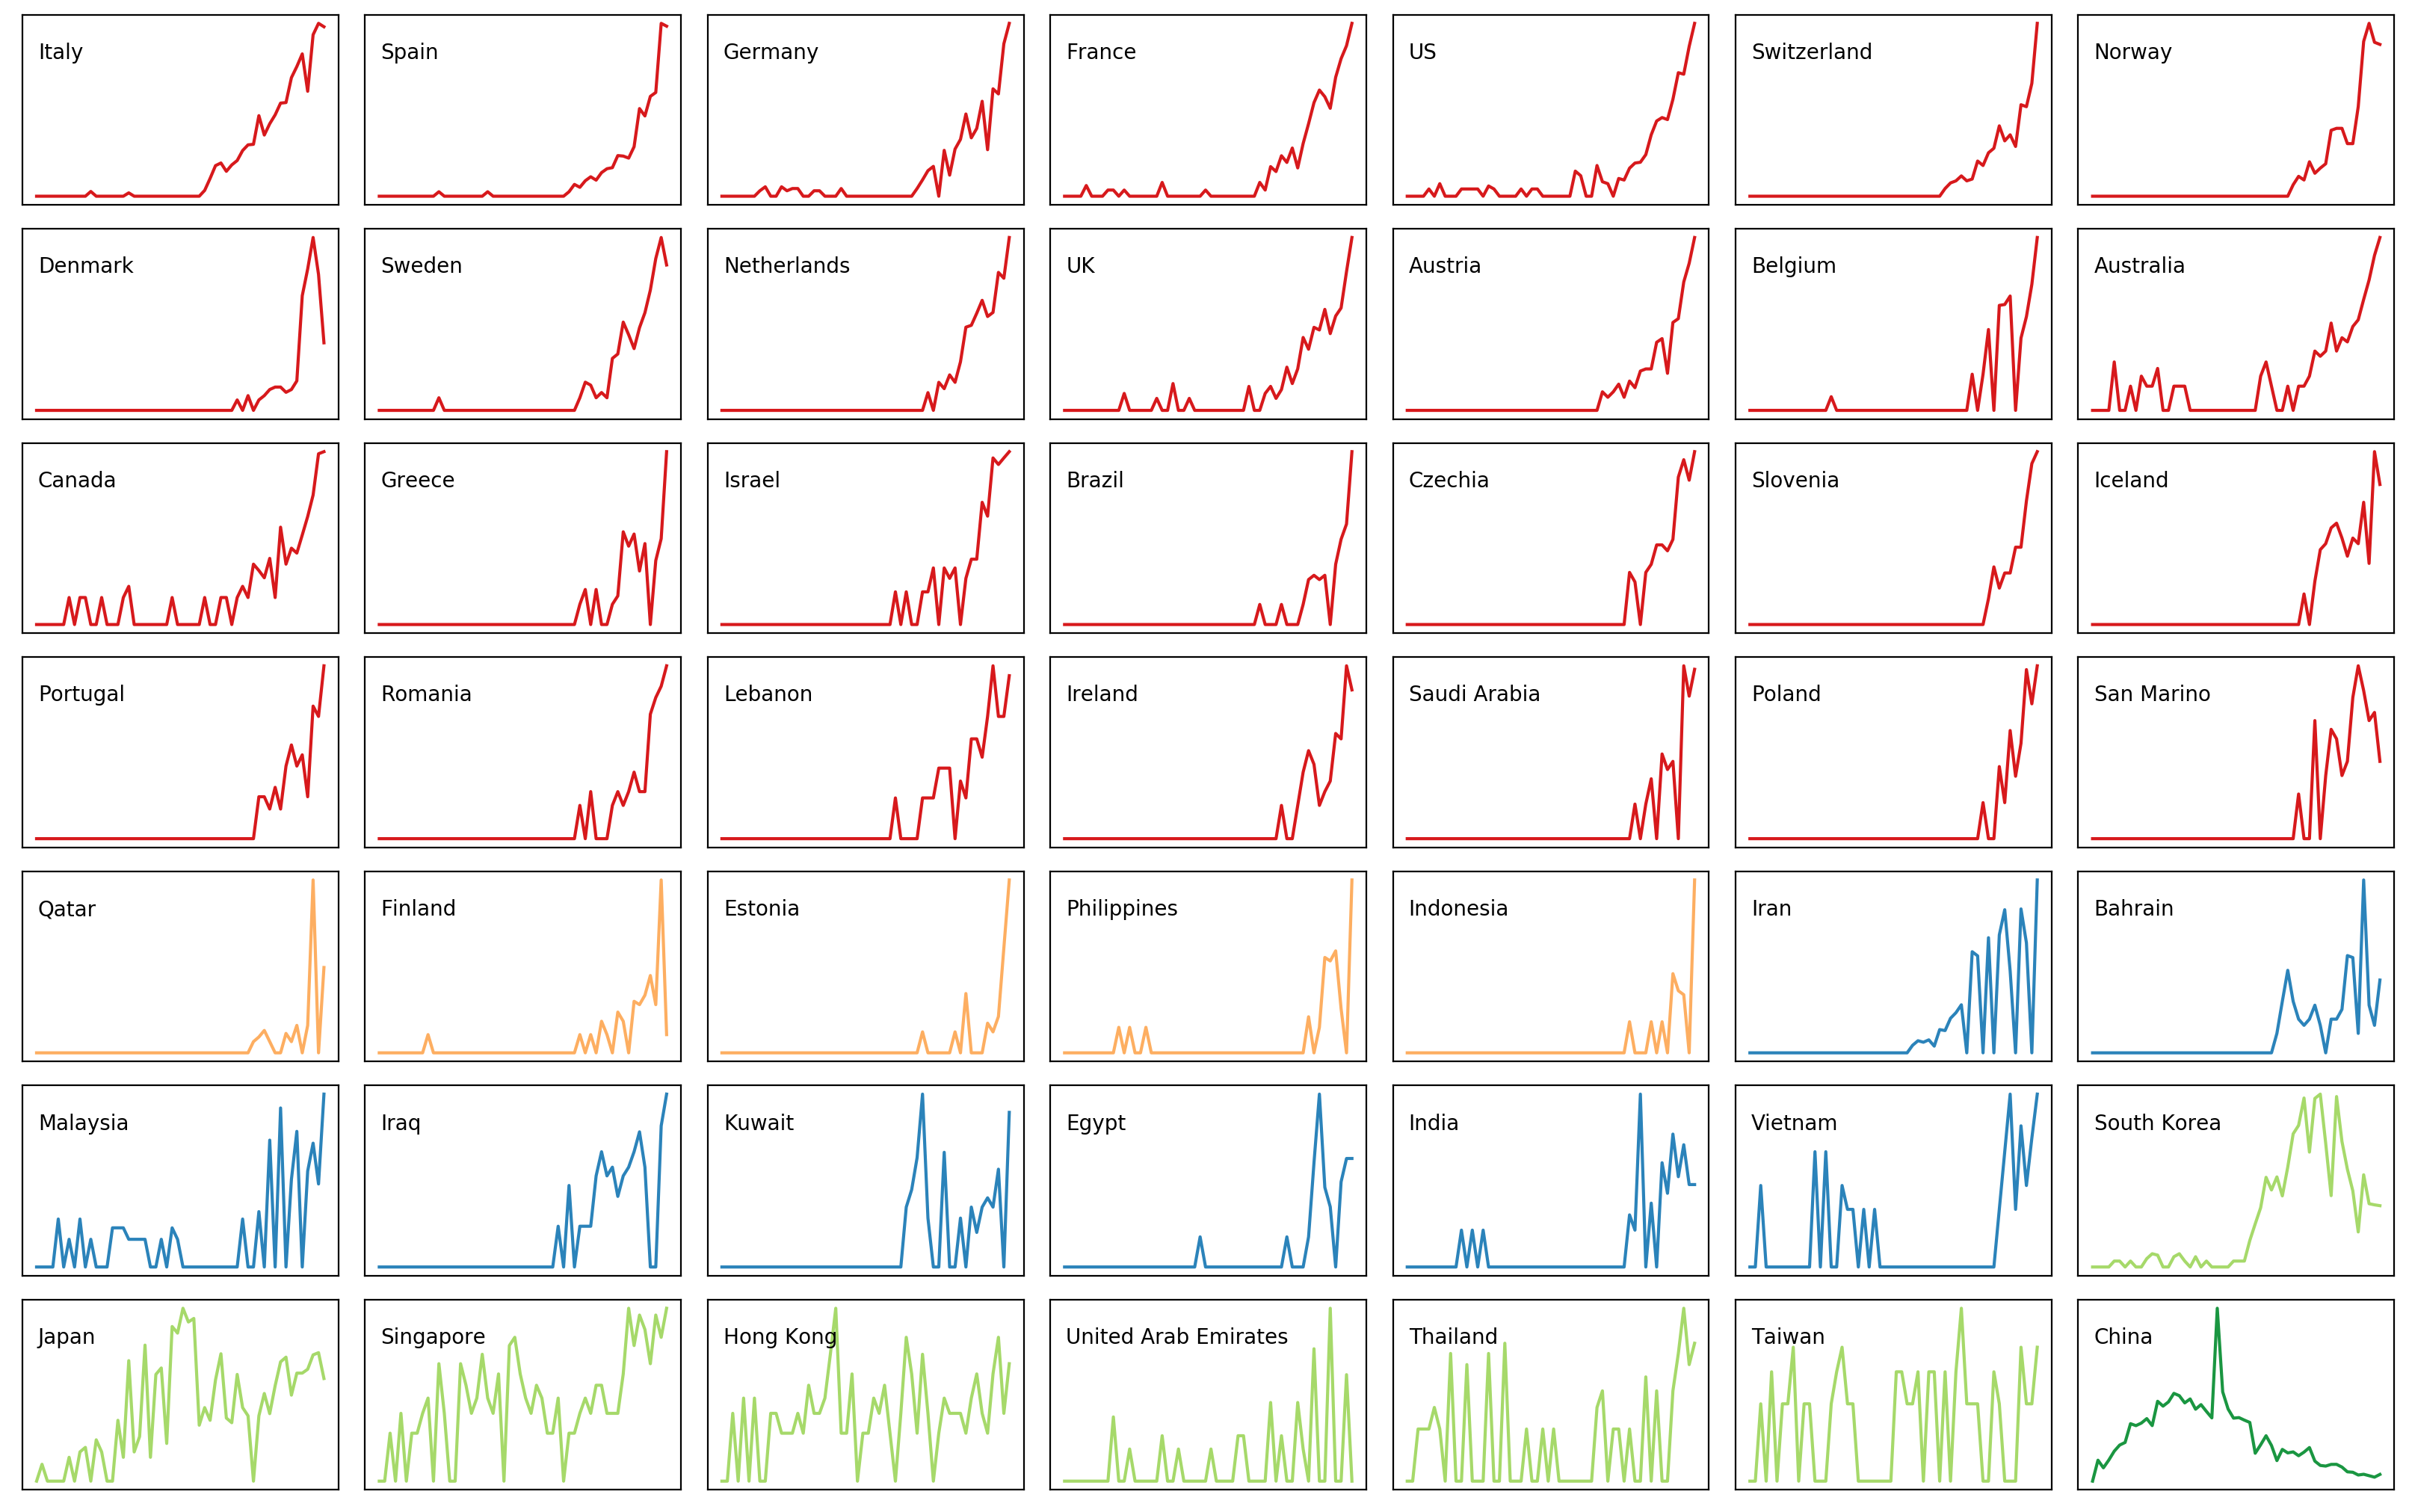

In [65]:
fig1 = plt.figure(figsize=(16,10), dpi=200, constrained_layout=True)

axs1 = fig1.subplots(nrows=7, ncols=7)

for order, i in clusterData.iterrows():          
        axs1.flat[order].plot(DailyDataFiftyNorm.index, DailyDataFiftyNorm[i['Region']], color=i['Color'])
        axs1.flat[order].get_xaxis().set_ticks([])
        axs1.flat[order].get_yaxis().set_ticks([])
        axs1.flat[order].annotate(i['Region'], (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')


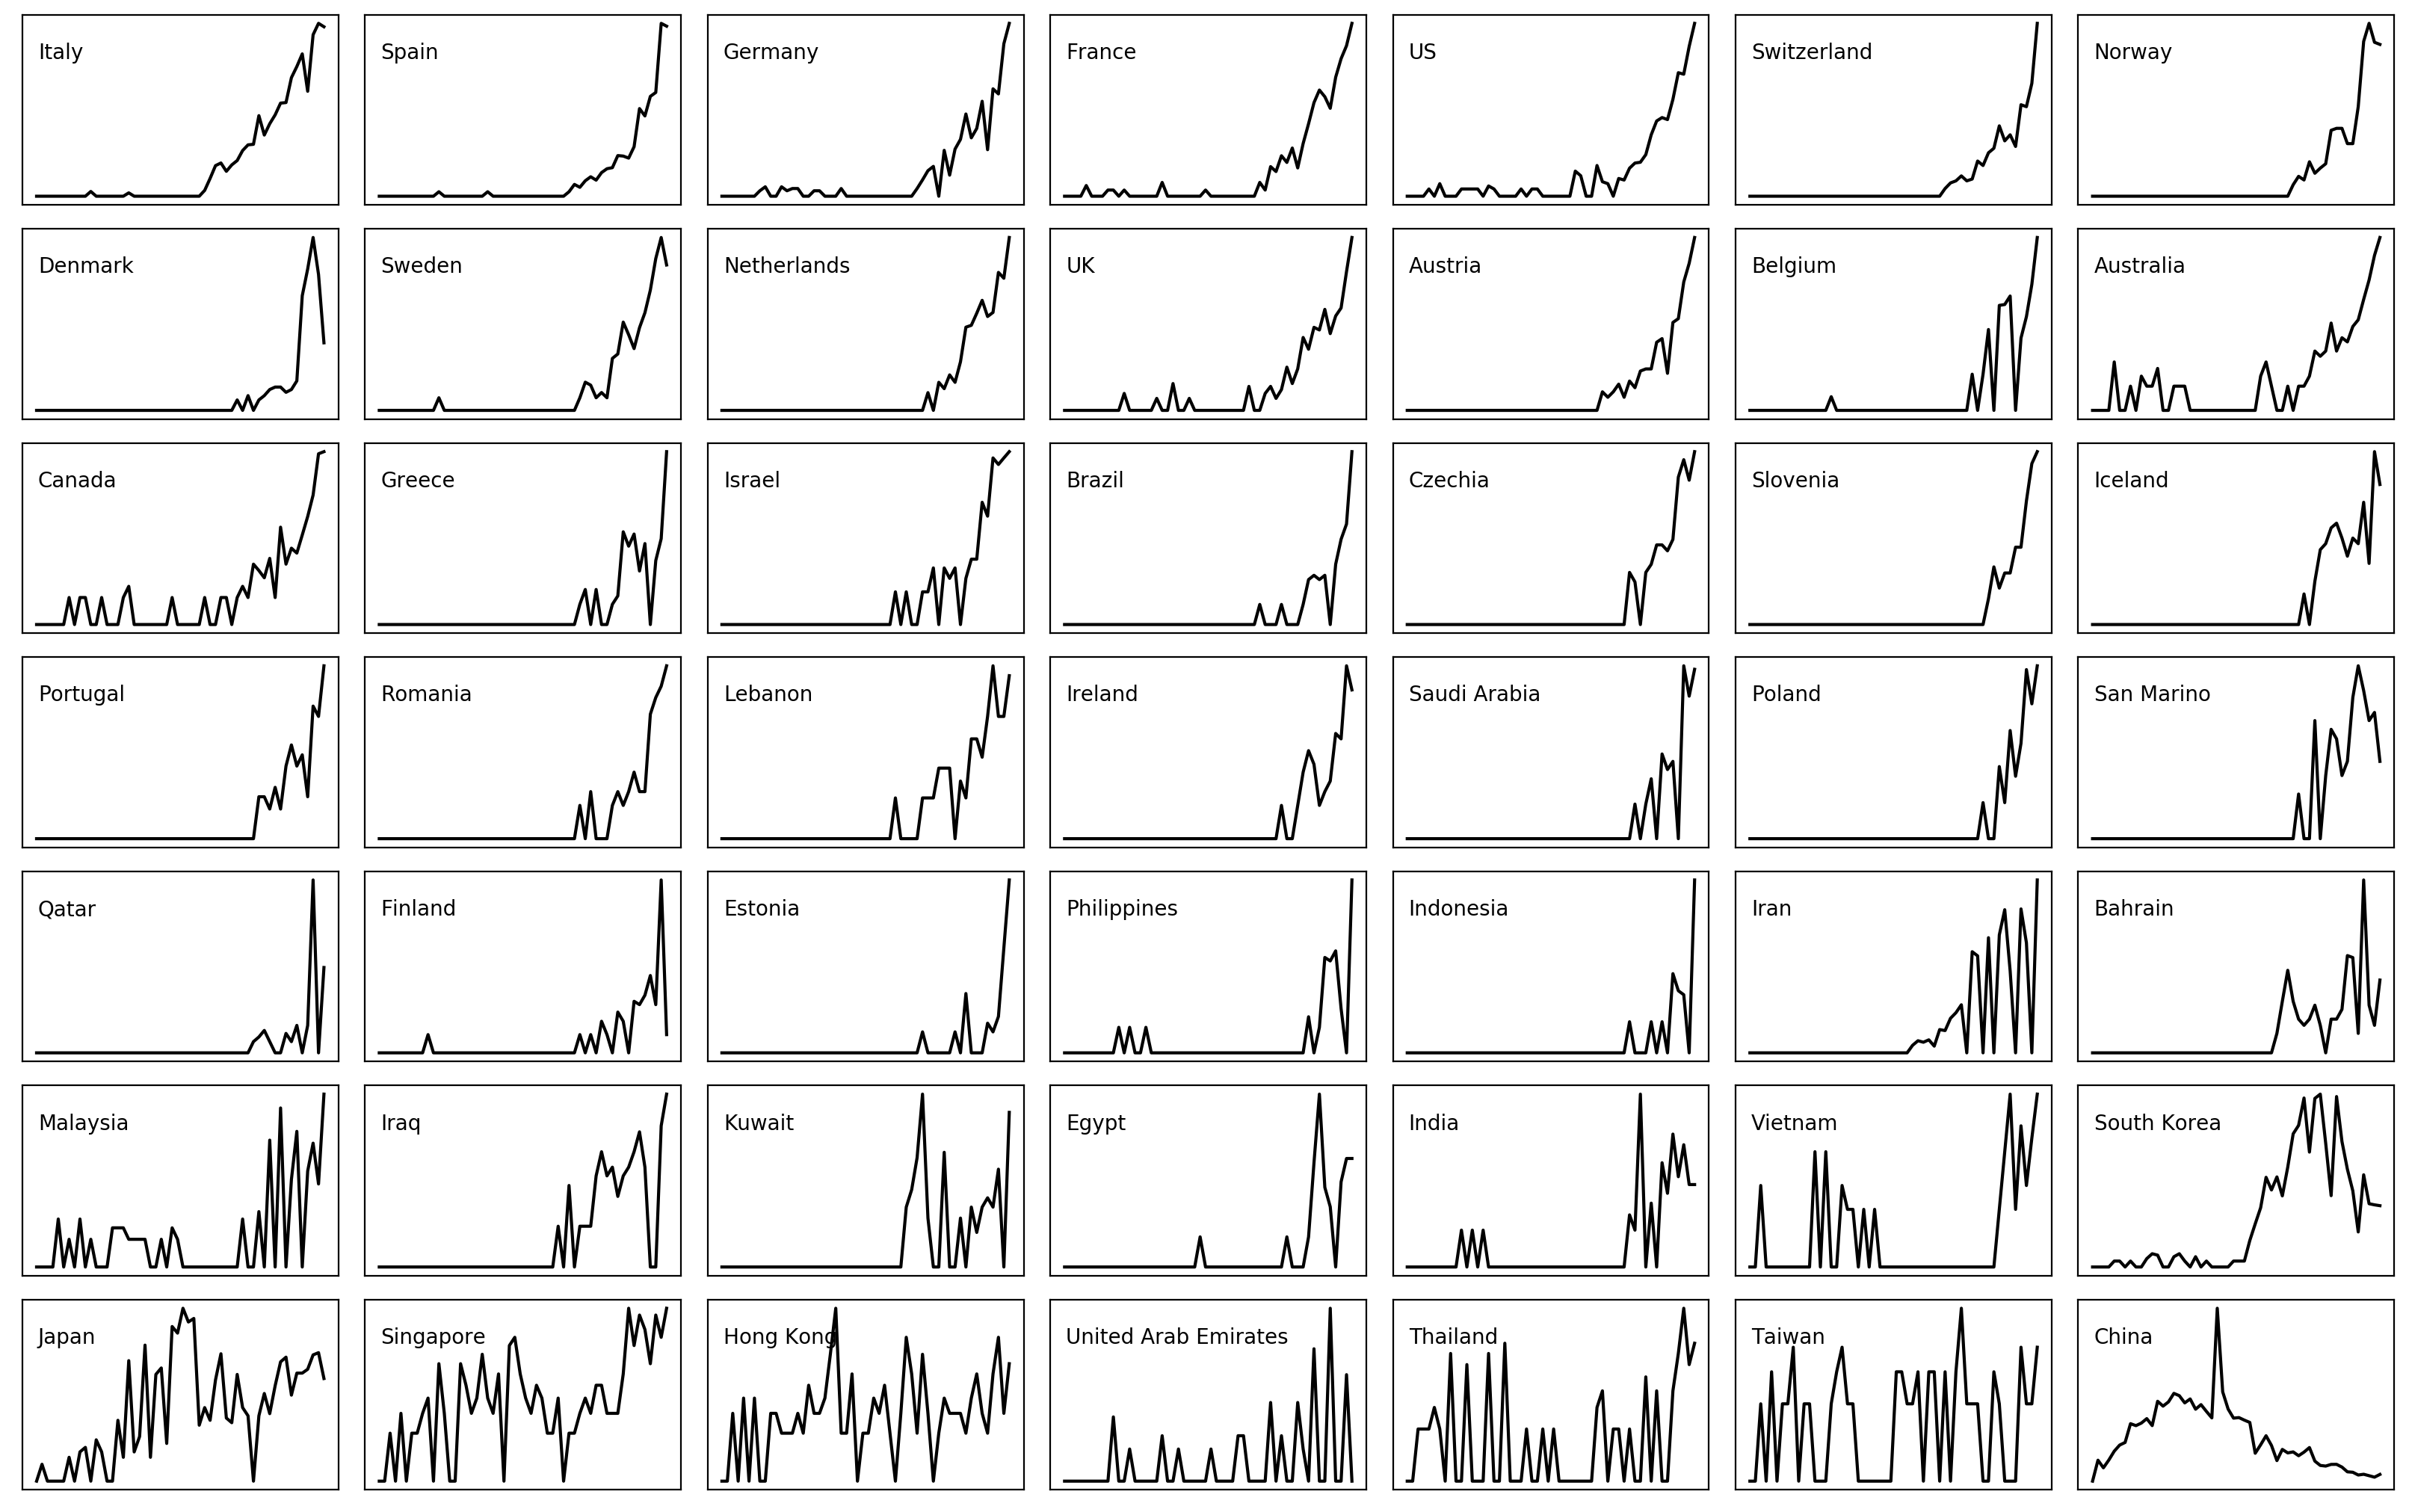

In [66]:
fig2 = plt.figure(figsize=(16,10), dpi=200, constrained_layout=True)

axs2 = fig2.subplots(nrows=7, ncols=7)

for order, i in clusterData.iterrows():          
        axs2.flat[order].plot(DailyDataFiftyNorm.index, DailyDataFiftyNorm[i['Region']], color='black')
        axs2.flat[order].get_xaxis().set_ticks([])
        axs2.flat[order].get_yaxis().set_ticks([])
        axs2.flat[order].annotate(i['Region'], (0.05, 0.8), xycoords='axes fraction', va='center', ha='left')

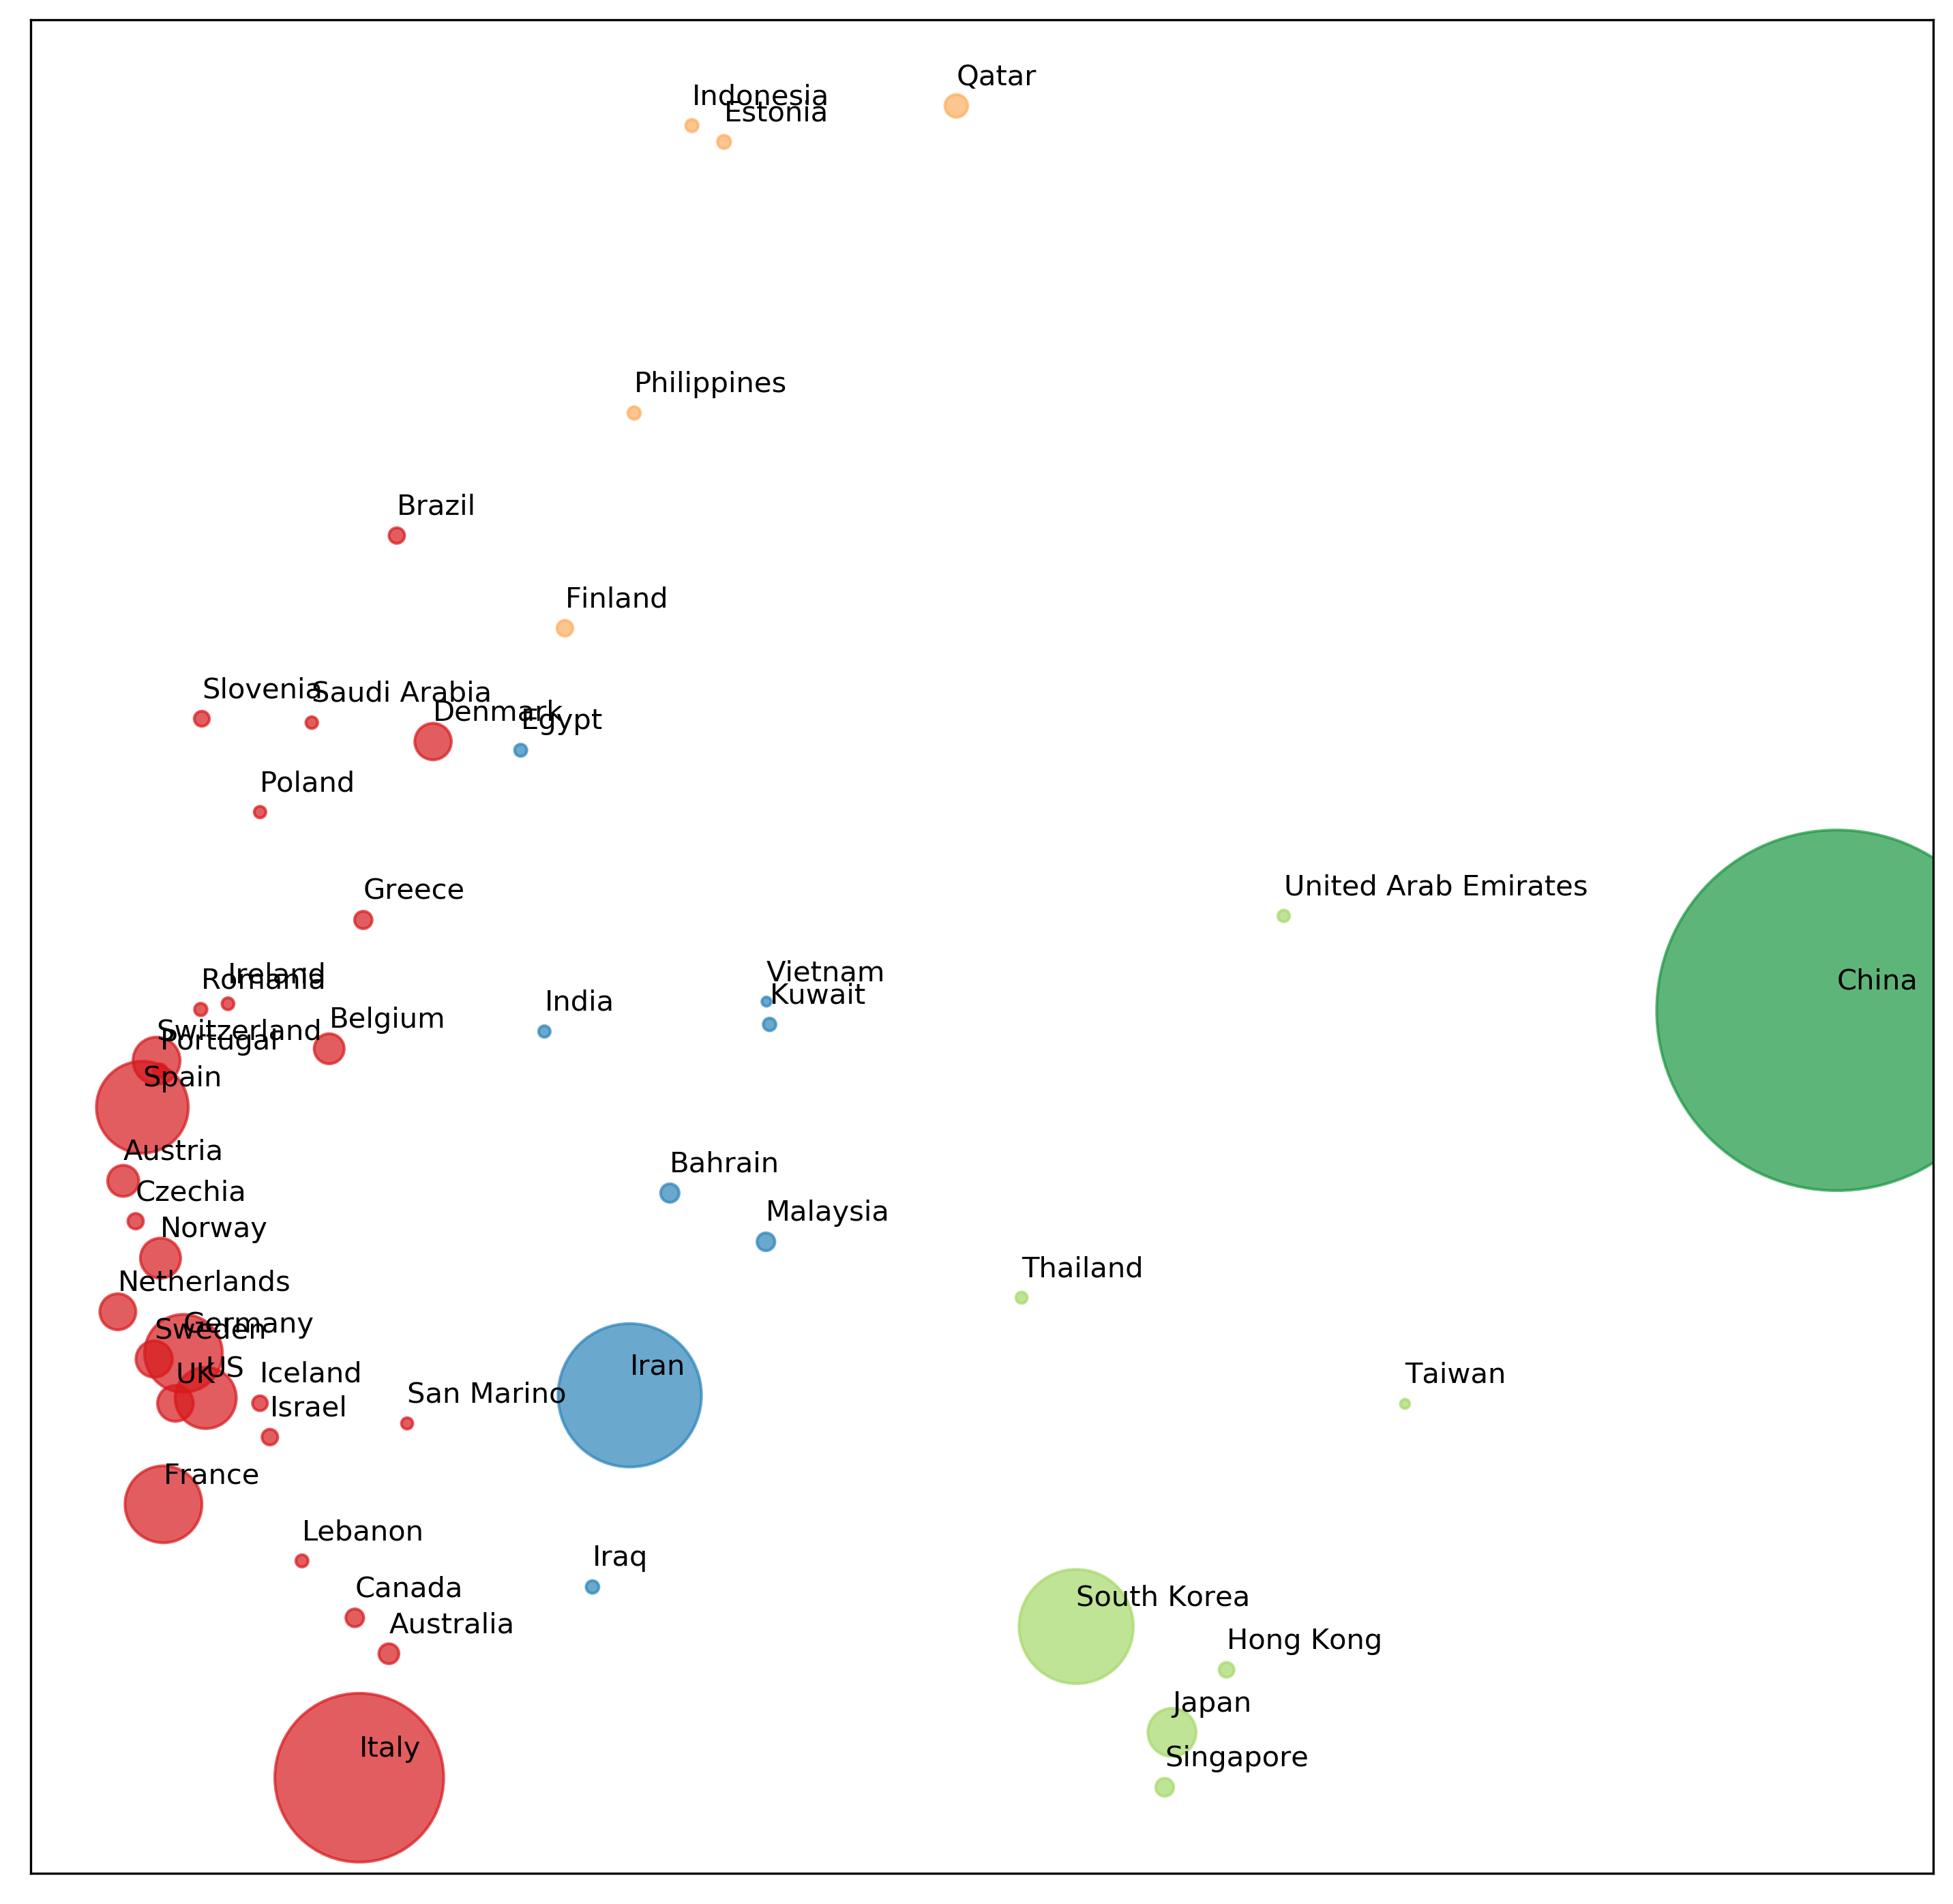

In [67]:
fig3 = plt.figure(figsize=(12,12), dpi=300)
ax1 = fig3.add_subplot()

ax1.scatter(clusterData['PC1'], clusterData['PC2'], c=clusterData['Color'], s=clusterData['Cases']/5,
            alpha=0.7)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
#ax1.set_xlabel('PC1({:.2%} variance explaianed)'.format(pca.explained_variance_[0]))
#ax1.set_ylabel('PC2({:.2%} variance explaianed)'.format(pca.explained_variance_[1]))

for i, txt in enumerate(clusterData['Region']):
    ax1.annotate(txt, (clusterData['PC1'][i], clusterData['PC2'][i]+0.02))


In [69]:
fig1.savefig('pattern_cluster.png')
fig2.savefig('pattern_uncluster.png')
fig3.savefig('pattern_PCoA.png', bbox_inches='tight')

### Confirmed vs. Recovered case animated plot

In [70]:
# Import csv file and store each csv into a df list
filename = os.listdir('../dash-2019-coronavirus/raw_data/')
sheet_name2 = [i.replace('.csv', '') for i in filename if 'data' not in i and i.endswith('.csv')]
sheet_name2.sort(reverse=True)

In [71]:
# Obtain list of date
timeStampe = pd.DataFrame({'TimeTag': sheet_name2})
timeStampe['DateTime'] = [datetime.strptime(d, '%Y-%m-%d-%H-%M') for d in timeStampe['TimeTag']]
timeStampe['DateTime_AEDT'] = timeStampe['DateTime'] + timedelta(hours=16)
# Select the latest data from a given date
timeStampe['Date_AEDT']=[d.date() for d in timeStampe['DateTime_AEDT']]
timeStampe = timeStampe.groupby(by='Date_AEDT', sort=False).first()
timeList = timeStampe['TimeTag']

In [72]:
dfs2 = {sheet_name: pd.read_csv('../dash-2019-coronavirus/raw_data/{}.csv'.format(sheet_name))
          for sheet_name in timeList}

for key, df in dfs2.items():
    dfs2[key].loc[:,'Confirmed'].fillna(value=0, inplace=True)
    dfs2[key].loc[:,'Deaths'].fillna(value=0, inplace=True)
    dfs2[key].loc[:,'Recovered'].fillna(value=0, inplace=True)
    dfs2[key]=dfs2[key].astype({'Confirmed':'int64', 'Deaths':'int64', 'Recovered':'int64'})
    # Change as China for coordinate search
    dfs2[key]=dfs2[key].replace({'Country/Region':'Mainland China'}, 'China')
    # Add a zero to the date so can be convert by datetime.strptime as 0-padded date
    dfs2[key]['Last Update'] = '0' + dfs2[key]['Last Update']
    # Convert time as Australian eastern daylight time
    dfs2[key]['Date_last_updated_AEDT'] = [datetime.strptime(d, '%m/%d/%Y %H:%M') for d in dfs2[key]['Last Update']]
    dfs2[key]['Date_last_updated_AEDT'] = dfs2[key]['Date_last_updated_AEDT'] + timedelta(hours=16)
    dfs2[key]['Date_last_updated_AEDT'] = [d.date() for d in dfs2[key]['Date_last_updated_AEDT']]
    dfs2[key] = dfs2[key].drop(['Last Update'], axis=1)
    dfs2[key] = dfs2[key].groupby(by='Country/Region', sort=False).sum()

In [73]:
dfs2[timeList[-8]]

,Confirmed,Deaths,Recovered
Country/Region,,,
China,4409,107,60
Hong Kong,8,0,0
Macau,6,0,0
Taiwan,5,0,0
US,5,0,0
Japan,4,0,1
Thailand,8,0,2
South Korea,4,0,0
Singapore,5,0,0


### Growth curves

In [93]:
RegionList = clusterData[clusterData['Cluster'] == 9]['Region']

In [96]:
dfs_cumulative = {sheet_name: pd.read_csv('../dash-2019-coronavirus/cumulative_data/{}.csv'.format(sheet_name))
          for sheet_name in RegionList}

AttributeError: 'str' object has no attribute 'sort_value'

In [99]:
for region in RegionList:
    dfs_cumulative[region] = dfs_cumulative[region].sort_values(by='date_day')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

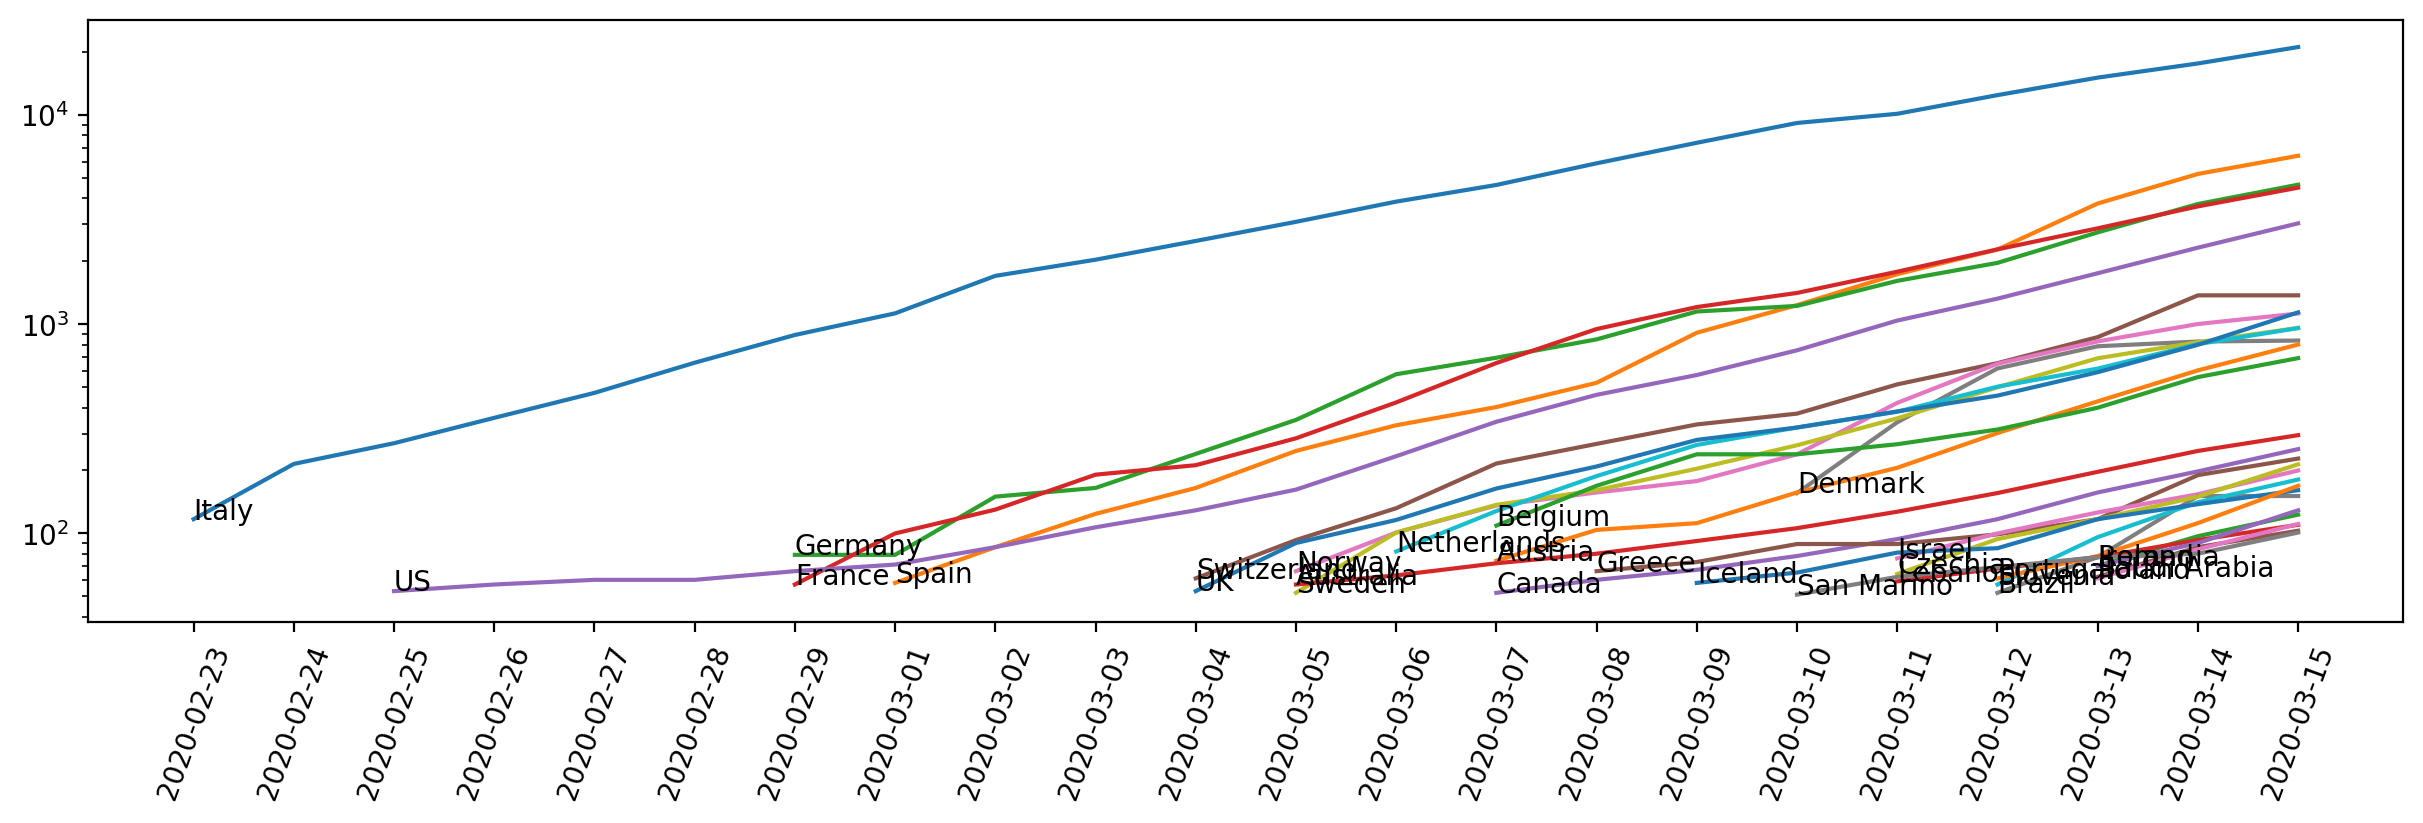

In [113]:
fig4 = plt.figure(figsize=(12,4), dpi=200, constrained_layout=True)
ax2 = fig4.subplots()
for region in RegionList:
    ax2.plot(dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].date_day, 
             dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].Confirmed)
    ax2.annotate(region, 
                 xy=(list(dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].date_day)[0],
                 list(dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].Confirmed)[0])
                )

ax2.set_yscale('log')
plt.xticks(rotation=70)
#axs1.flat[order].get_xaxis().set_ticks([])
#axs1.flat[order].get_yaxis().set_ticks([])
#axs1.flat[order].annotate(i['Region'], (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')

In [108]:
list(dfs_cumulative['Italy'][dfs_cumulative[region]['Confirmed']>50].date_day)[-1]

'2020-03-15'